1.导入需要的模块

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

2.实例化数据集，可视化数据集

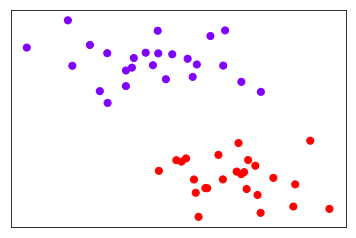

In [2]:
x,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(x[:,0],x[:,1]
           ,c=y
           ,s=50
           ,cmap="rainbow"
           )
plt.xticks([])#不画坐标，这两个函数实现了x,y都没有坐标
plt.yticks([])
plt.show()

In [3]:
x.shape

(50, 2)

In [4]:
y.shape

(50,)

3.定义决策边界的函数

(-0.43660961990940284, 5.772756283035797)

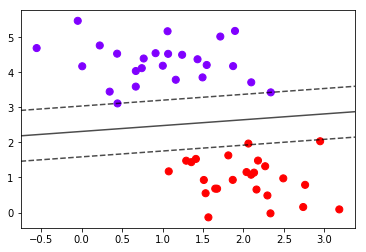

In [10]:
plt.scatter(x[:,0],x[:,1]
           ,c=y
           ,s=50
           ,cmap="rainbow"
           )
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
xlim = ax.get_xlim()
ylim = ax.get_ylim() #默认创建（0.0，1.0）范围内的横纵坐标

#要画决策边界，必须要有网络
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
axisy,axisx = np.meshgrid(axisy,axisx)#将特征向量转为
#特征矩阵的函数，核心是将2个特征向量广播，以便获得y.shape*x.shape
#这么多个坐标点的横坐标和纵坐标

xy = np.vstack([axisx.ravel(),axisy.ravel()]).T

#建模，通过fit计算对应的决策边界
clf = SVC(kernel="linear").fit(x,y)
p = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function,返回每个输入的样本所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,p
          ,colors="black"
          ,levels=[-1,0,1]
          ,alpha=0.7
          ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [15]:
#将上述过程包装成一个函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim() #默认创建（0.0，1.0）范围内的横纵坐标

    #要画决策边界，必须要有网络
    axisx = np.linspace(xlim[0],xlim[1],30)
    axisy = np.linspace(ylim[0],ylim[1],30)
    axisy,axisx = np.meshgrid(axisy,axisx)#将特征向量转为
    #特征矩阵的函数，核心是将2个特征向量广播，以便获得y.shape*x.shape
    #这么多个坐标点的横坐标和纵坐标

    xy = np.vstack([axisx.ravel(),axisy.ravel()]).T

    p = model.decision_function(xy).reshape(axisx.shape)
    #重要接口decision_function,返回每个输入的样本所对应的到决策边界的距离
    #然后再将这个距离转换为axisx的结构

    #画决策边界和平行于决策边界的超平面
    ax.contour(axisx,axisy,p
              ,colors="black"
              ,levels=[-1,0,1]
              ,alpha=0.7
              ,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

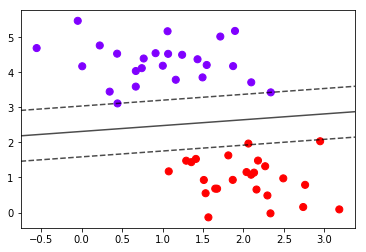

In [16]:
clf = SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [21]:
xlim

(-0.7541740493109252, 3.3838081780236036)

In [22]:
xlim[0]#最小值

-0.7541740493109252

In [24]:
min(xlim)

-0.7541740493109252

In [25]:
max(xlim)

3.3838081780236036

In [23]:
xlim[1]#最大值

3.3838081780236036

如果数据线性不可分，怎么解决呢？

In [17]:
from sklearn.datasets import make_circles
x,y = make_circles(100,factor=0.1,noise=0.1)
x.shape

(100, 2)

In [18]:
y.shape

(100,)

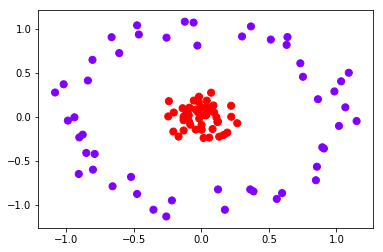

In [19]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.show()

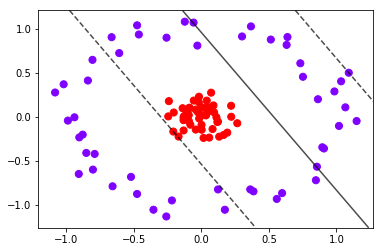

In [20]:
clf = SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

在原来二维的基础上，增加一个维度r

In [58]:
r = np.exp(-(x**2).sum(1))#x1**2+x2**2
# r = np.sqrt((x ** 2).sum(1))

In [59]:
r.shape

(100,)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


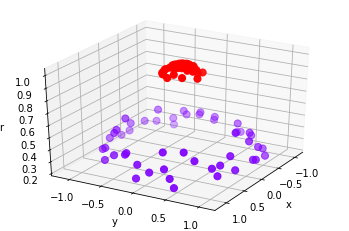

In [60]:
rlim = np.linspace(min(r),max(r),0.2)
from mpl_toolkits import mplot3d
def plot_3d(elev=30,azim=30,x=x,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap="rainbow")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

plot_3d()

In [61]:
from ipywidgets import interact,fixed
interact(plot_3d,evel=[0,30],azip=(-180,180),x=fixed(x),y=fixed(y))
plt.show()
# plot_3d()

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


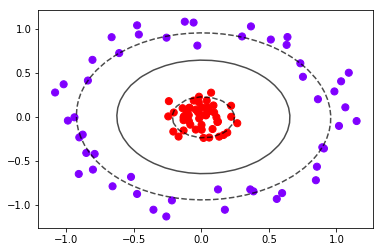

In [62]:
clf = SVC(kernel="rbf").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

月亮型数据

In [63]:
from sklearn.datasets import make_moons

In [76]:
x,y = make_moons(n_samples=100, shuffle=True, noise=0.05, random_state=1)
x.shape

(100, 2)

In [77]:
y.shape

(100,)

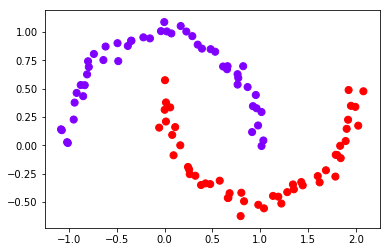

In [78]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.show()

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


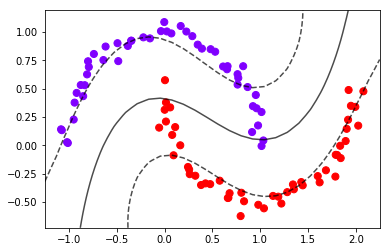

In [79]:
clf = SVC(kernel="rbf").fit(x,y)# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' ora callable.
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

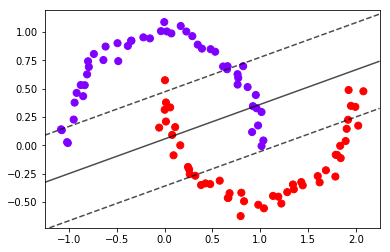

In [80]:
clf = SVC(kernel="linear").fit(x,y)# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' ora callable.
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


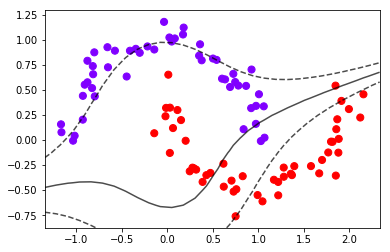

In [69]:
clf = SVC(kernel="poly").fit(x,y)# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' ora callable.
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


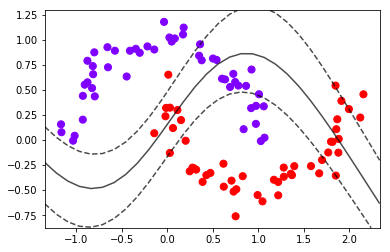

In [70]:
clf = SVC(kernel="sigmoid").fit(x,y)# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' ora callable.
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [34]:
a = np.array([[1,2],[3,4],[5,6]])

In [35]:
a.shape

(3, 2)

In [36]:
a.sum(1)

array([ 3,  7, 11])

In [14]:
a = np.array([1,2,3]) #a.shape=3
b = np.array([7,8])   #b.shape=2
v1,v2 = np.meshgrid(a,b) #a变成b.shape倍的v1,  b变成a.shape倍的v2

In [15]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [16]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [20]:
v = np.stack([v1.ravel(),v2.ravel()]) #v1.ravel()直接变一维，拉直--[1，2，3，1，2，3]
                                         #v2.ravel()------[7，7，7，8，8，8]

In [21]:
v

array([[1, 2, 3, 1, 2, 3],
       [7, 7, 7, 8, 8, 8]])

In [22]:
v.T

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])